<a href="https://colab.research.google.com/github/mesimoa/MESIMO-BAN6420/blob/main/Abiola_mesimo_Module_4_Netflix_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Assignment Instructions**
Follow these steps to complete the assignment:

1. Perform data preparation by unzipping the dataset and renaming it to "Netflix_shows_movies."

2. Address missing values in the dataset through data cleaning.

3. Conduct data exploration, including generating data descriptions and performing statistical analysis.

4. Create visualizations to represent the most watched genres and the distribution of ratings using Python libraries (Seaborn, Pyplot, and Matplotlib).

5. Integrate one of the charts or visualizations into R.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Load and explore the data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
netflix_data = pd.read_csv("/content/drive/MyDrive/netflix_shows-movies.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#I renamed the dataset
netflix_shows_movies = netflix_data.copy()

In [5]:
#It was a scatter table so redesigned it
from IPython.display import display
styled_df = netflix_shows_movies.head().style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'blue',
    'border-color': 'white'
})
display(styled_df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
1,80117401,Movie,Jandino: Whatever it Takes,nan,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
2,70234439,TV Show,Transformers Prime,nan,"Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
3,80058654,TV Show,Transformers: Robots in Disguise,nan,"Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."


In [6]:
from IPython.display import display
styled_df = netflix_shows_movies.tail().style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'blue',
    'border-color': 'black'
})
display(styled_df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,nan,"Burnie Burns, Jason Saldaña, Gustavo Sorola, Geoff Lazer Ramsey, Joel Heyman, Matt Hullum, Dan Godwin, Kathleen Zuelch, Yomary Cruz, Nathan Zellner",United States,nan,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy","This parody of first-person shooter games, military life and science-fiction films centers on a civil war fought in the middle of a desolate canyon."
6230,70286564,TV Show,Maron,nan,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zehetner, Andy Kindler",United States,nan,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews fellow comedians for his popular podcast, only to reveal more about his own neuroses and relationships."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,nan,nan,nan,nan,2016,nan,60 min,Movies,"Nursery rhymes and original music for children accompanied by bright, playful animation engage and educate about numbers, shapes, colors and more."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,nan,"Daniel Radcliffe, Jon Hamm, Adam Godley, Christopher Godwin, Rosie Cavaliero, Vicki Pepperdine, Margaret Clunie, Tim Steed, Shaun Pye",United Kingdom,nan,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic miniseries is based on a doctor's memories of his early career working in an out-of-the-way village."
6233,70153404,TV Show,Friends,nan,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,nan,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan."


**Data Check and Cleaning Process**

In [7]:
#Checking for the shape,
print(netflix_shows_movies.shape)

print(netflix_shows_movies.info())


(6234, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


In [8]:
# Checking for missing values
missing_values = netflix_shows_movies.isnull().sum()
print("Missing values in each column:\n")
for column, value in missing_values.items():
    print(f"{column:<20} {value:<5}")

#missing value was filled with 'Null'
netflix_shows_movies.fillna('Null', inplace=True)

#Verification that no missing value is left worked on
cleaned_missing_values = netflix_shows_movies.isnull().sum()
print("\nMissing values after cleaning:\n")
for column, value in cleaned_missing_values.items():
    print(f"{column:<20} {value:<5}")


Missing values in each column:

show_id              0    
type                 0    
title                0    
director             1969 
cast                 570  
country              476  
date_added           11   
release_year         0    
rating               10   
duration             0    
listed_in            0    
description          0    

Missing values after cleaning:

show_id              0    
type                 0    
title                0    
director             0    
cast                 0    
country              0    
date_added           0    
release_year         0    
rating               0    
duration             0    
listed_in            0    
description          0    


In [9]:
#I change the data type to ensure object is done to split
netflix_shows_movies['show_id'] = netflix_shows_movies['show_id'].astype('string')
netflix_shows_movies['type'] = netflix_shows_movies['type'].astype('category')
netflix_shows_movies['title'] = netflix_shows_movies['title'].astype('string')
netflix_shows_movies['director'] = netflix_shows_movies['director'].astype('string')
netflix_shows_movies['cast'] = netflix_shows_movies['cast'].astype('string')
netflix_shows_movies['country'] = netflix_shows_movies['country'].astype('string')
netflix_shows_movies['release_year'] = netflix_shows_movies['release_year'].astype('int')
netflix_shows_movies['rating'] = netflix_shows_movies['rating'].astype('category')
netflix_shows_movies['duration'] = netflix_shows_movies['duration'].astype('string')
netflix_shows_movies['listed_in'] = netflix_shows_movies['listed_in'].astype('string')
netflix_shows_movies['description'] = netflix_shows_movies['description'].astype('string')

**Data Exploration**

In [10]:
#statistical summary of the data
print(netflix_shows_movies.describe())


       release_year
count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000


In [11]:
summary = netflix_shows_movies.describe(include='all').T


print(summary)

               count unique  \
show_id         6234   6234   
type            6234      2   
title           6234   6172   
director        6234   3302   
cast            6234   5470   
country         6234    555   
date_added      6234   1525   
release_year  6234.0    NaN   
rating          6234     15   
duration        6234    201   
listed_in       6234    461   
description     6234   6226   

                                                            top  freq  \
show_id                                                81145628     1   
type                                                      Movie  4265   
title                                               The Silence     3   
director                                                   Null  1969   
cast                                                       Null   570   
country                                           United States  2032   
date_added                                      January 1, 2020   122   
release_year

In [12]:
#calculates and prints the number of unique values in each column of the netflix_shows_movies DataFrame
#I will be using it to check the uniqueness of data in each column
print(netflix_shows_movies.nunique())

show_id         6234
type               2
title           6172
director        3302
cast            5470
country          555
date_added      1525
release_year      72
rating            15
duration         201
listed_in        461
description     6226
dtype: int64


In [13]:
print(netflix_shows_movies['rating'].value_counts())

rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
Null          10
UR             7
NC-17          2
Name: count, dtype: int64


In [14]:
print(netflix_shows_movies.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# **Data Visualisation**

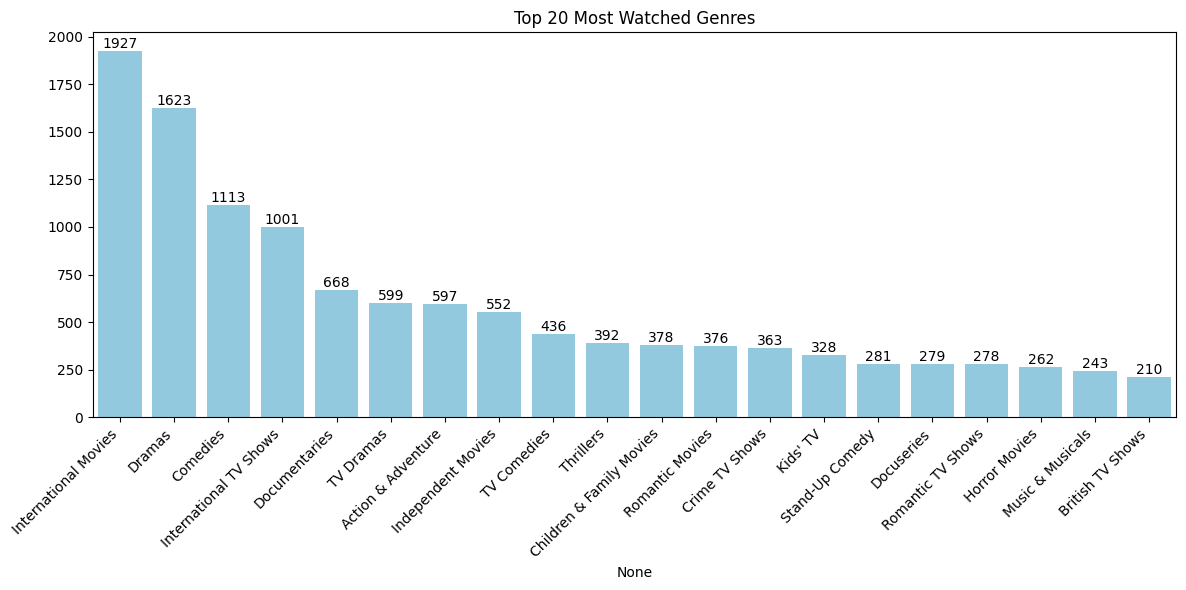

In [20]:
# Split genres into separate rows and count the occurrences
genre_counts = netflix_data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(20)

# Create the bar plot with a single color
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Top 20 Most Watched Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add text labels on the bars
for index, value in enumerate(genre_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

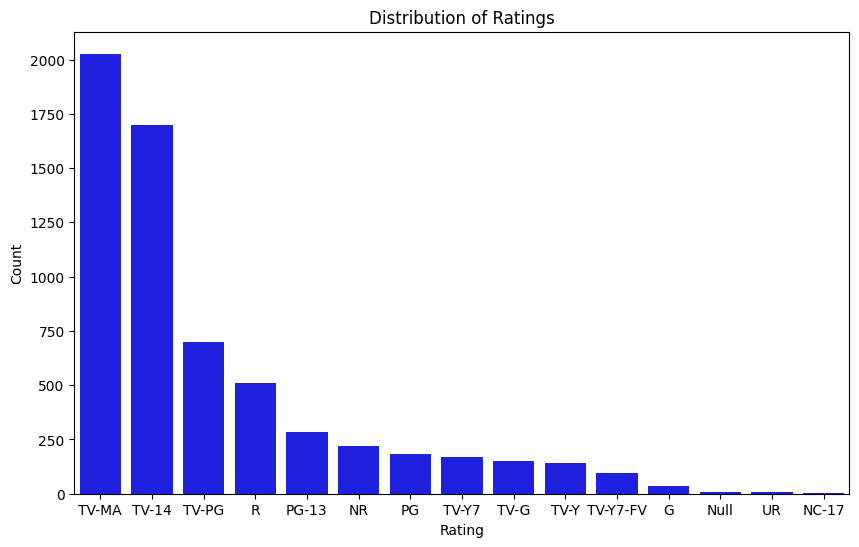

In [18]:
# Distribution of 'rating'
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_shows_movies, x='rating', order=netflix_shows_movies['rating'].value_counts().index, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# **R Integration: At this point R was integrated to Python**
**Set up R Environment**

In [1]:
# Install rpy2
!pip install rpy2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Load Netflix data
netflix_data = pd.read_csv("/content/drive/MyDrive/netflix_shows-movies.csv")

# Save the dataframe to a CSV file
netflix_data.to_csv('/content/netflix_data.csv', index=False)

# Load rpy2
%load_ext rpy2.ipython


ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected symbol
1: # Install rpy2
2: !pip install
        ^


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
netflix_data = pd.read_csv("/content/drive/MyDrive/netflix_shows-movies.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
netflix_data = pd.read_csv("/content/drive/MyDrive/netflix_shows-movies.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
netflix_data = pd.read_csv("/content/drive/MyDrive/netflix_shows-movies.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **I Switched to the R Runtime Environment**

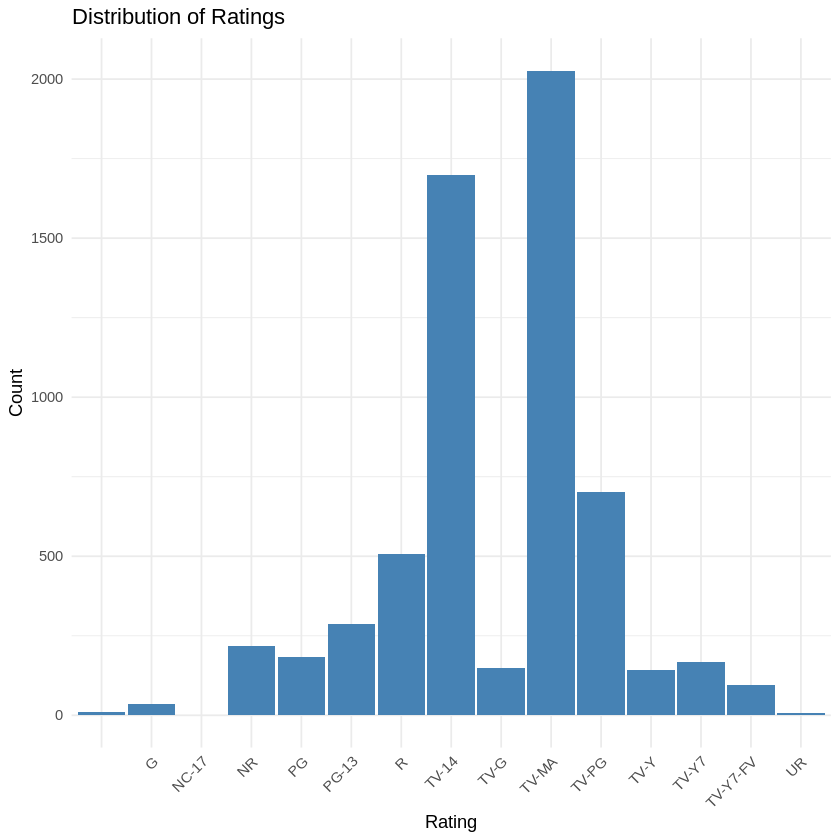

In [ ]:
# read back the data saved; instead of using a copy data method
netflix_data <- read.csv('/content/netflix_data.csv')

# online search to ensure the necessary libraries needed for the R chart is added
library(ggplot2)
library(dplyr)

# Convert columns to appropriate data types and creating the plot
netflix_data$rating <- as.factor(netflix_data$rating)
ggplot(netflix_data, aes(x = rating)) +
  geom_bar(fill = "blue", width = 0.85) +
  theme_minimal() +
  labs(title = 'Distribution of Ratings',
       x = 'Rating',
       y = 'Count') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
